<a href="https://colab.research.google.com/github/RishitaChawla19/Intro_to_ML/blob/main/Assignment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, confusion_matrix, ConfusionMatrixDisplay)

In [2]:
# Load the dataset
breast = load_breast_cancer()
X = breast.data
y = breast.target
feature_names = breast.feature_names

In [3]:
# Split data into train and test (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
print("\n=== Problem 1: Logistic Regression ===")

# (i) Logistic Regression without penalty
logreg = LogisticRegression(penalty=None, max_iter=1000)
logreg.fit(X_train_scaled, y_train)
y_pred = logreg.predict(X_test_scaled)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n(i) Results without weight penalty:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


=== Problem 1: Logistic Regression ===

(i) Results without weight penalty:
Accuracy: 0.9386
Precision: 0.9848
Recall: 0.9155
F1 Score: 0.9489


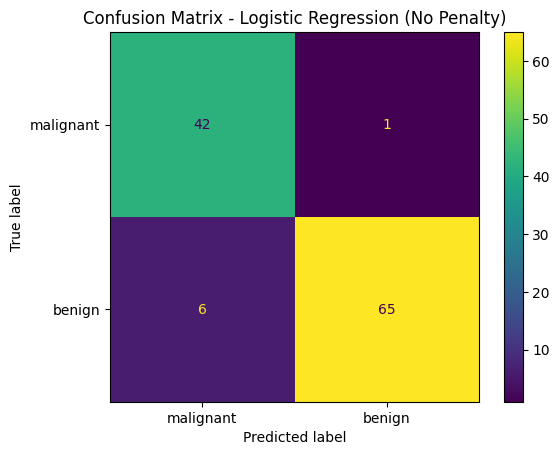

In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=breast.target_names)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression (No Penalty)")
plt.show()

In [6]:
# (ii) Logistic Regression with L2 penalty
logreg_l2 = LogisticRegression(penalty='l2', max_iter=1000, solver='liblinear')
logreg_l2.fit(X_train_scaled, y_train)
y_pred_l2 = logreg_l2.predict(X_test_scaled)

In [14]:
# Calculate metrics
accuracy_l2 = accuracy_score(y_test, y_pred_l2)
precision_l2 = precision_score(y_test, y_pred_l2)
recall_l2 = recall_score(y_test, y_pred_l2)
f1_l2 = f1_score(y_test, y_pred_l2)

print("\n(ii) Results with L2 weight penalty:")
print(f"Accuracy: {accuracy_l2:.4f}")
print(f"Precision: {precision_l2:.4f}")
print(f"Recall: {recall_l2:.4f}")
print(f"F1 Score: {f1_l2:.4f}")


(ii) Results with L2 weight penalty:
Accuracy: 0.9737
Precision: 0.9722
Recall: 0.9859
F1 Score: 0.9790


In [15]:
##############################################################################
# Problem 2: Naive Bayes Classifier
##############################################################################

print("\n=== Problem 2: Naive Bayes Classifier ===")

# (i) Naive Bayes model
nb = GaussianNB()
nb.fit(X_train_scaled, y_train)
y_pred_nb = nb.predict(X_test_scaled)
# Calculate metrics
accuracy_nb = accuracy_score(y_test, y_pred_nb)
precision_nb = precision_score(y_test, y_pred_nb)
recall_nb = recall_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)

# (ii) Comparison with Logistic Regression
print("\n(ii) Comparison with Logistic Regression:")
print(f"LogReg Accuracy: {accuracy:.4f} vs Naive Bayes: {accuracy_nb:.4f}")
print(f"LogReg Precision: {precision:.4f} vs Naive Bayes: {precision_nb:.4f}")
print(f"LogReg Recall: {recall:.4f} vs Naive Bayes: {recall_nb:.4f}")
print(f"LogReg F1 Score: {f1:.4f} vs Naive Bayes: {f1_nb:.4f}")




=== Problem 2: Naive Bayes Classifier ===

(ii) Comparison with Logistic Regression:
LogReg Accuracy: 0.9386 vs Naive Bayes: 0.9649
LogReg Precision: 0.9848 vs Naive Bayes: 0.9589
LogReg Recall: 0.9155 vs Naive Bayes: 0.9859
LogReg F1 Score: 0.9489 vs Naive Bayes: 0.9722


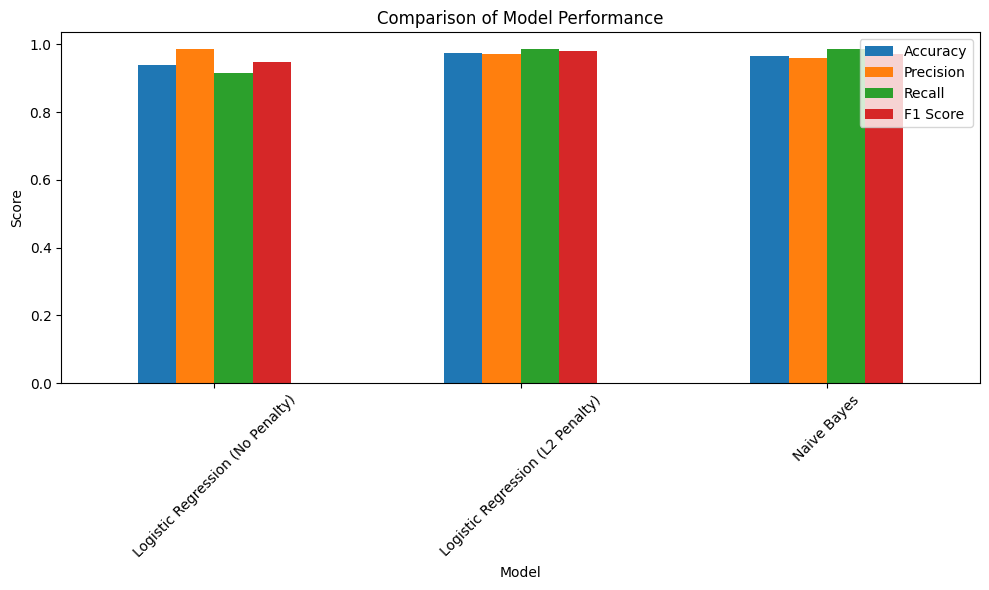

In [17]:


# Create a dictionary to store the metrics for each model
metrics = {
    'Logistic Regression (No Penalty)': {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    },
    'Logistic Regression (L2 Penalty)': {
        'Accuracy': accuracy_l2,
        'Precision': precision_l2,
        'Recall': recall_l2,
        'F1 Score': f1_l2
    },
    'Naive Bayes': {
        'Accuracy': accuracy_nb,
        'Precision': precision_nb,
        'Recall': recall_nb,
        'F1 Score': f1_nb
    }
}

# Create the plot
metrics_df = pd.DataFrame(metrics).T
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Comparison of Model Performance')
plt.ylabel('Score')
plt.xlabel('Model')
plt.xticks(rotation=45)
plt.legend(loc='upper right')
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [11]:
print("\n=== Problem 3: SVM Classifier ===")

# (i) SVM model
svm = SVC(kernel='linear', C=1.0)
svm.fit(X_train_scaled, y_train)
y_pred_svm = svm.predict(X_test_scaled)

# Calculate metrics
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1_svm = f1_score(y_test, y_pred_svm)


print("\n(i) SVM Results:")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")

# (ii) Comparison with previous models
print("\n(ii) Comparison with previous models:")
print(f"LogReg Accuracy: {accuracy:.4f}, NB: {accuracy_nb:.4f}, SVM: {accuracy_svm:.4f}")
print(f"LogReg Precision: {precision:.4f}, NB: {precision_nb:.4f}, SVM: {precision_svm:.4f}")
print(f"LogReg Recall: {recall:.4f}, NB: {recall_nb:.4f}, SVM: {recall_svm:.4f}")



=== Problem 3: SVM Classifier ===

(i) SVM Results:
Accuracy: 0.9561
Precision: 0.9714
Recall: 0.9577
F1 Score: 0.9645

(ii) Comparison with previous models:
LogReg Accuracy: 0.9386, NB: 0.9649, SVM: 0.9561
LogReg Precision: 0.9848, NB: 0.9589, SVM: 0.9714
LogReg Recall: 0.9155, NB: 0.9859, SVM: 0.9577



=== Problem 4: Logistic Regression with PCA ===

Optimal number of principal components: 2
Best accuracy achieved: 0.9912


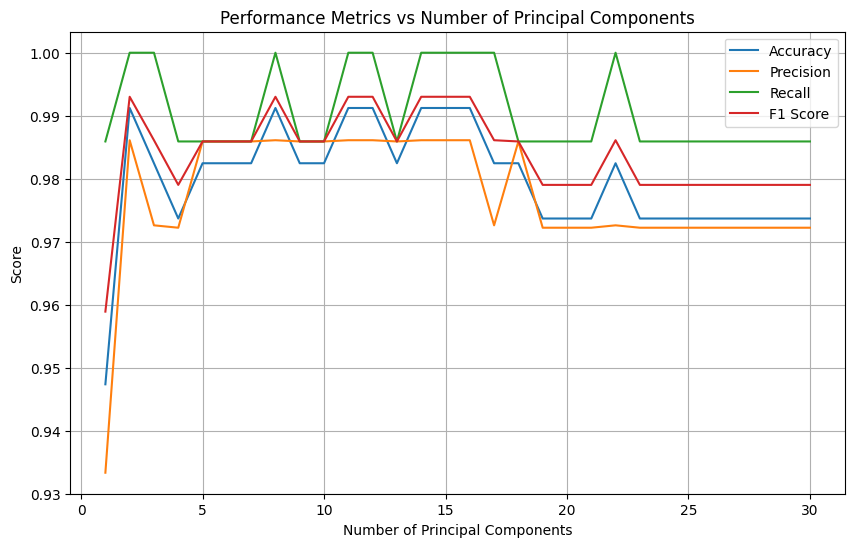


Comparison with previous models:
LogReg (Full Features) Accuracy: 0.9386
LogReg (PCA, k=2) Accuracy: 0.9912
Naive Bayes Accuracy: 0.9649
SVM Accuracy: 0.9561


In [12]:
##############################################################################
# Problem 4: Logistic Regression with PCA
##############################################################################

print("\n=== Problem 4: Logistic Regression with PCA ===")

# Initialize variables to track best performance
best_k = 0
best_accuracy = 0
accuracies = []
precisions = []
recalls = []
f1_scores = []

# Try different numbers of principal components
max_components = min(X_train_scaled.shape[0], X_train_scaled.shape[1])
for k in range(1, max_components + 1):
    pca = PCA(n_components=k)
    X_train_pca = pca.fit_transform(X_train_scaled)
    X_test_pca = pca.transform(X_test_scaled)

    logreg_pca = LogisticRegression(max_iter=1000)
    logreg_pca.fit(X_train_pca, y_train)
    y_pred_pca = logreg_pca.predict(X_test_pca)

    # Calculate metrics
    accuracy_pca = accuracy_score(y_test, y_pred_pca)
    precision_pca = precision_score(y_test, y_pred_pca)
    recall_pca = recall_score(y_test, y_pred_pca)
    f1_pca = f1_score(y_test, y_pred_pca)

    accuracies.append(accuracy_pca)
    precisions.append(precision_pca)
    recalls.append(recall_pca)
    f1_scores.append(f1_pca)

    if accuracy_pca > best_accuracy:
        best_accuracy = accuracy_pca
        best_k = k
print(f"\nOptimal number of principal components: {best_k}")
print(f"Best accuracy achieved: {best_accuracy:.4f}")


# Plot metrics vs number of components
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_components + 1), accuracies, label='Accuracy')
plt.plot(range(1, max_components + 1), precisions, label='Precision')
plt.plot(range(1, max_components + 1), recalls, label='Recall')
plt.plot(range(1, max_components + 1), f1_scores, label='F1 Score')
plt.xlabel('Number of Principal Components')
plt.ylabel('Score')
plt.title('Performance Metrics vs Number of Principal Components')
plt.legend()
plt.grid()
plt.show()


# Comparison with previous models
print("\nComparison with previous models:")
print(f"LogReg (Full Features) Accuracy: {accuracy:.4f}")
print(f"LogReg (PCA, k={best_k}) Accuracy: {best_accuracy:.4f}")
print(f"Naive Bayes Accuracy: {accuracy_nb:.4f}")
print(f"SVM Accuracy: {accuracy_svm:.4f}")